In [1]:
!date

Tue Nov  4 03:03:16 PM EST 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import pandas as pd
import ants
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [4]:
def pretty_t_test(vec1,vec2,ttl,alternative='two-sided'):
    from scipy.stats import ttest_rel
    t,p = ttest_rel(np.arctanh(vec1),np.arctanh(vec2),alternative=alternative) # Fisher Z transform before t-testing
    degf = len(vec1)-1
    diff = vec1.mean()-vec2.mean()

    if p < .001:
        print(f'{ttl} ΔM={diff:.3f}, t({int(degf)}) = {t:.2f}, p < .001')
    else:
        print(f'{ttl} ΔM={diff:.3f}, t({int(degf)}) = {t:.2f}, p = {p:.3f}')

In [5]:
def plot_scatter(vec1,vec2,xlabel='',ylabel='',title=''):
    plt.scatter(vec1, vec2, color='blue', label='Data points',s=150)
    f = 20
    plt.xticks(fontsize=f)
    plt.yticks(fontsize=f)

    # Adding the parity line (where y = x)
    # Determine the limits for the line based on the data range:
    min_val = min(np.min(vec1), np.min(vec2))
    max_val = max(np.max(vec1), np.max(vec2))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Parity line (y=x)')

    # Add labels and title
    plt.xlabel(xlabel,fontsize=16,fontweight='bold')
    plt.ylabel(ylabel,fontsize=16,fontweight='bold')
    plt.grid(True)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def pretty_bar_plot(
    means,
    sems,
    bar_colors=['#003f5c', '#003f5c', '#00bcd4'],
    bar_edge_thickness=2.5,
    errorbar_thickness=3.5,
    tick_fontsize=20,
    tick_fontweight='bold',
    label_fontsize=22,
    y_max=None,
    significance_bars=[((0, 1), '*'), ((0, 2), '*'), ((1, 2), '*')],
    x_labels=['None', 'CompCor', 'DeepCor'],
    bar_spacing=1.2
):
    """

    Parameters:
        means, sems: List of means and standard errors.
        bar_colors: List of bar fill colors.
        bar_edge_thickness: Thickness of bar outline.
        errorbar_thickness: Thickness of error bars.
        tick_fontsize, tick_fontweight: Tick label styling.
        label_fontsize: Font size for axis labels.
        y_max: Optional y-axis limit.
        significance_bars: List of tuples ((bar1, bar2), marker).
        x_labels: Labels for each bar.
        bar_spacing: Distance between bars (default = 1.2).
    """
    
    n_bars = len(means)
    xs = np.arange(n_bars) * bar_spacing

    fig, ax = plt.subplots(figsize=(7, 9))

    # Bar plot with error bars
    ax.bar(xs, means, yerr=sems, capsize=10,
           color=bar_colors,
           edgecolor='black',
           linewidth=bar_edge_thickness,
           ecolor='black',
           error_kw=dict(linewidth=errorbar_thickness),
           zorder=2)

    # Axes and tick formatting
    ax.set_xticks(xs)
    ax.set_xticklabels(x_labels, fontsize=tick_fontsize, fontweight=tick_fontweight)
    #ax.set_ylabel('Value', fontsize=label_fontsize, fontweight='bold')
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    for label in ax.get_yticklabels():
        label.set_fontweight(tick_fontweight)

    # Axis limit
    if y_max is None:
        y_max = max([m + s for m, s in zip(means, sems)]) + 3

    # Grid and frame aesthetics
    ax.yaxis.grid(True, linestyle='--', linewidth=1.5, alpha=0.4, zorder=1)
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)


    plt.tight_layout()
    plt.show()

In [7]:
corr_res = np.load('../Data/fixed-seed-00-YuOrig-00-DataloaderFix.npy')
#corr_res = corr_res[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],:,:]
idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#idx = [0,1,2,3,4,5,6,7,8,13]
#idx = [13,7,4,5,  3, 10, 11,  0, 12,  8]
#idx = [13,  7,2,  5,  3, 10, 11,  0, 12,  8]
corr_res = corr_res[idx,:,:]

nsubs = corr_res.shape[0]
nsubs

14

In [8]:
vec_ffa = corr_res.mean(axis=1)[:,0]
vec_compcor = corr_res.mean(axis=1)[:,1]
vec_deepcor = corr_res.mean(axis=1)[:,2]

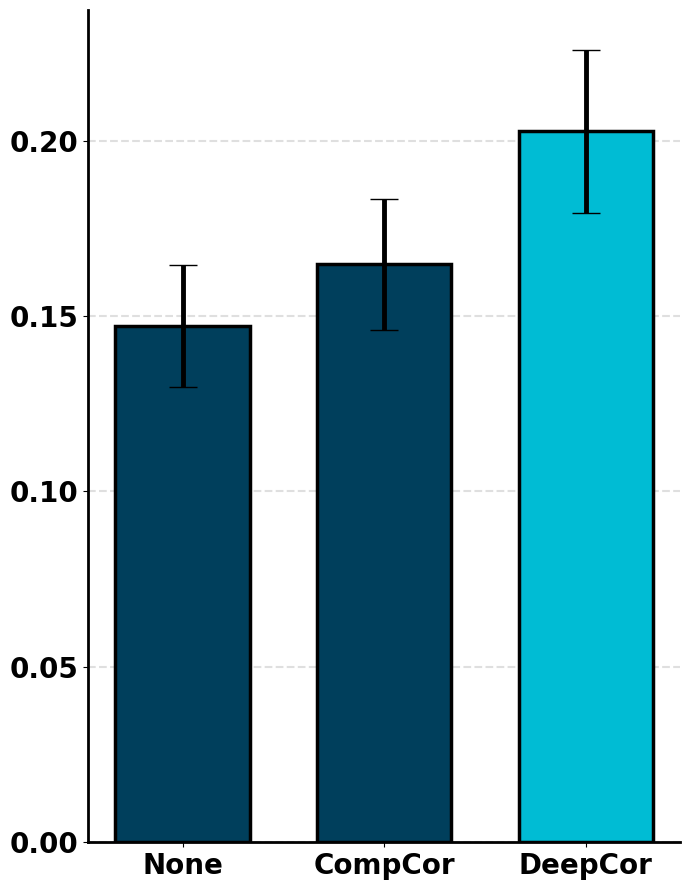

In [9]:
arrs = [vec_ffa,vec_compcor,vec_deepcor]

means = [arrs[0].mean(),arrs[1].mean(),arrs[2].mean()]
sems =[arrs[0].std(),arrs[1].std(),arrs[2].std()]
sems = np.array(sems) / np.sqrt(nsubs)

pretty_bar_plot(means,sems)

In [10]:
print(vec_ffa.mean())
print(vec_compcor.mean())
print(vec_deepcor.mean())

0.14717861326352108
0.1647899671856951
0.20271773632444168


In [11]:
pretty_t_test(vec_compcor,vec_ffa,'CompCor > NoDenoise: ')
pretty_t_test(vec_deepcor,vec_ffa,'DeepCor > NoDenoise: ')
pretty_t_test(vec_deepcor,vec_compcor,'DeepCor > CompCor: ')

CompCor > NoDenoise:  ΔM=0.018, t(13) = 4.61, p < .001
DeepCor > NoDenoise:  ΔM=0.056, t(13) = 4.41, p < .001
DeepCor > CompCor:  ΔM=0.038, t(13) = 2.84, p = 0.014


In [12]:
from scipy.stats import ttest_rel
vec1=vec_compcor
vec2=vec_ffa
t,p = ttest_rel(np.arctanh(vec1),np.arctanh(vec2))
print(p)

from scipy.stats import ttest_rel
vec1=vec_deepcor
vec2=vec_ffa
t,p = ttest_rel(np.arctanh(vec1),np.arctanh(vec2))
print(p)

from scipy.stats import ttest_rel
vec1=vec_deepcor
vec2=vec_compcor
t,p = ttest_rel(np.arctanh(vec1),np.arctanh(vec2))
print(p)

0.0004914735574119403
0.0007104389397237657
0.013824418711773704


In [13]:
0.0005
0.0007
0.0138

0.0138

In [14]:
d1=vec_compcor.mean()-vec_ffa.mean()
d2=vec_deepcor.mean()-vec_compcor.mean()
print(d1)
print(d2)
print(f'Correlation improvement: {d2/d1:.2f}x')
print(f'Correlation improvement: {d2/d1*100:.0f}%')

0.017611353922174028
0.03792776913874657
Correlation improvement: 2.15x
Correlation improvement: 215%


'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

/tmp/ipykernel_3186199/122016190.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname='../Figures/DeepCor-Fig2-scatterplots-1.pdf',
/tmp/ipykernel_3186199/122016190.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname='../Figures/DeepCor-Fig2-scatterplots-1.pdf',
/tmp/ipykernel_3186199/122016190.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname='../Figures/DeepCor-Fig2-scatterplots-2.pdf',
/tmp/ipykernel_3186199/122016190.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and wi

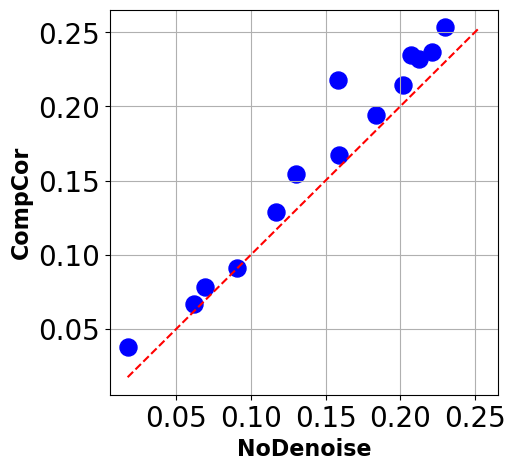

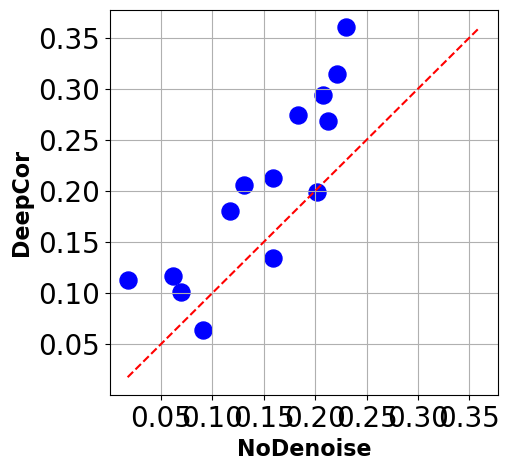

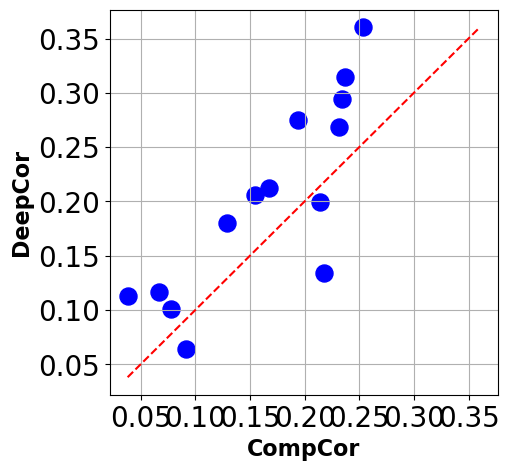

In [30]:
#idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

plt.figure(figsize=(5,5))
#plt.subplot(1,3,1);
plot_scatter(vec_ffa,vec_compcor,xlabel='NoDenoise',ylabel='CompCor',title='')

plt.savefig(fname='../Figures/DeepCor-Fig2-scatterplots-1.pdf',
        dpi=None, 
        facecolor='w', 
        edgecolor='w',
        orientation='portrait',
        papertype=None, 
        format='pdf',
        transparent=True, 
        bbox_inches=None,
        pad_inches=0.1,
        frameon=True,
        metadata=None)


#plt.subplot(1,3,2);
plt.figure(figsize=(5,5))
plot_scatter(vec_ffa,vec_deepcor,xlabel='NoDenoise',ylabel='DeepCor',title='')

plt.savefig(fname='../Figures/DeepCor-Fig2-scatterplots-2.pdf',
        dpi=None, 
        facecolor='w', 
        edgecolor='w',
        orientation='portrait',
        papertype=None, 
        format='pdf',
        transparent=True, 
        bbox_inches=None,
        pad_inches=0.1,
        frameon=True,
        metadata=None)

#plt.subplot(1,3,3);
plt.figure(figsize=(5,5))
plot_scatter(vec_compcor,vec_deepcor,xlabel='CompCor',ylabel='DeepCor',title='')

plt.savefig(fname='../Figures/DeepCor-Fig2-scatterplots-3.pdf',
        dpi=None, 
        facecolor='w', 
        edgecolor='w',
        orientation='portrait',
        papertype=None, 
        format='pdf',
        transparent=True, 
        bbox_inches=None,
        pad_inches=0.1,
        frameon=True,
        metadata=None)



In [16]:
# idx = [0,1,2,3,4,5,6,7,8,13]

# plt.figure(figsize=(5,5))
# #plt.subplot(1,3,1);
# plot_scatter(vec_ffa[idx],vec_compcor[idx],xlabel='NoDenoise',ylabel='CompCor',title='')
# #plt.subplot(1,3,2);
# plt.figure(figsize=(5,5))
# plot_scatter(vec_ffa[idx],vec_deepcor[idx],xlabel='NoDenoise',ylabel='DeepCor',title='')
# #plt.subplot(1,3,3);
# plt.figure(figsize=(5,5))
# plot_scatter(vec_compcor[idx],vec_deepcor[idx],xlabel='CompCor',ylabel='DeepCor',title='')

In [41]:
def pretty_bar_plot2(
    means,
    sems,
    arrs,
    figsize,
    bar_colors=['#003f5c', '#003f5c', '#00bcd4'],
    bar_edge_thickness=2.5,
    errorbar_thickness=3.5,
    tick_fontsize=20,
    tick_fontweight='bold',
    label_fontsize=22,
    y_max=None,
    significance_bars=[((0, 1), '*'), ((0, 2), '*'), ((1, 2), '*')],
    x_labels=['None', 'CompCor', 'DeepCor'],
    bar_spacing=1.2
):
    """

    Parameters:
        means, sems: List of means and standard errors.
        bar_colors: List of bar fill colors.
        bar_edge_thickness: Thickness of bar outline.
        errorbar_thickness: Thickness of error bars.
        tick_fontsize, tick_fontweight: Tick label styling.
        label_fontsize: Font size for axis labels.
        y_max: Optional y-axis limit.
        significance_bars: List of tuples ((bar1, bar2), marker).
        x_labels: Labels for each bar.
        bar_spacing: Distance between bars (default = 1.2).
    """
    
    n_bars = len(means)
    xs = np.arange(n_bars) * bar_spacing
    #x_bars = xs

    fig, ax = plt.subplots(figsize=figsize)

    bar_colors=[list(np.array([0,63,91,255])/255*.5),
      list(np.array([0,63,91,255])/255*.5),
      list(np.array([0,188,210])/255)]

    # Bar plot with error bars
    ax.bar(xs, means, yerr=sems, capsize=10,
           color=bar_colors,
           edgecolor='black',
           linewidth=bar_edge_thickness,
           ecolor='black',
           error_kw=dict(linewidth=errorbar_thickness),
           zorder=2)

    # Axes and tick formatting
    ax.set_xticks(xs)
    ax.set_xticklabels(x_labels, fontsize=tick_fontsize, fontweight=tick_fontweight)
    #ax.set_ylabel('Value', fontsize=label_fontsize, fontweight='bold')
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    for label in ax.get_yticklabels():
        label.set_fontweight(tick_fontweight)

    # Axis limit
    if y_max is None:
        y_max = max([m + s for m, s in zip(means, sems)]) + 3

    # Grid and frame aesthetics
    ax.yaxis.grid(True, linestyle='--', linewidth=1.5, alpha=0.4, zorder=1)
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    for i in range(len(arrs)):
        ys = arrs[i]
        n = len(ys)
        x = np.repeat(xs[i],n).astype(np.float64)
        x+=(np.random.rand(n)-.5)*.3
        #plt.scatter(xs,ys,s=30,c=0)
        plt.plot(x,ys,'k.',markersize=25)

    plt.savefig(fname='../Figures/DeepCor-Fig2-barplot.pdf',
        dpi=None, 
        facecolor='w', 
        edgecolor='w',
        orientation='portrait',
        papertype=None, 
        format='pdf',
        transparent=True, 
        bbox_inches=None,
        pad_inches=0.1,
        frameon=True,
        metadata=None)
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3186199/1902994793.py:78: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname='../Figures/DeepCor-Fig2-barplot.pdf',
/tmp/ipykernel_3186199/1902994793.py:78: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname='../Figures/DeepCor-Fig2-barplot.pdf',


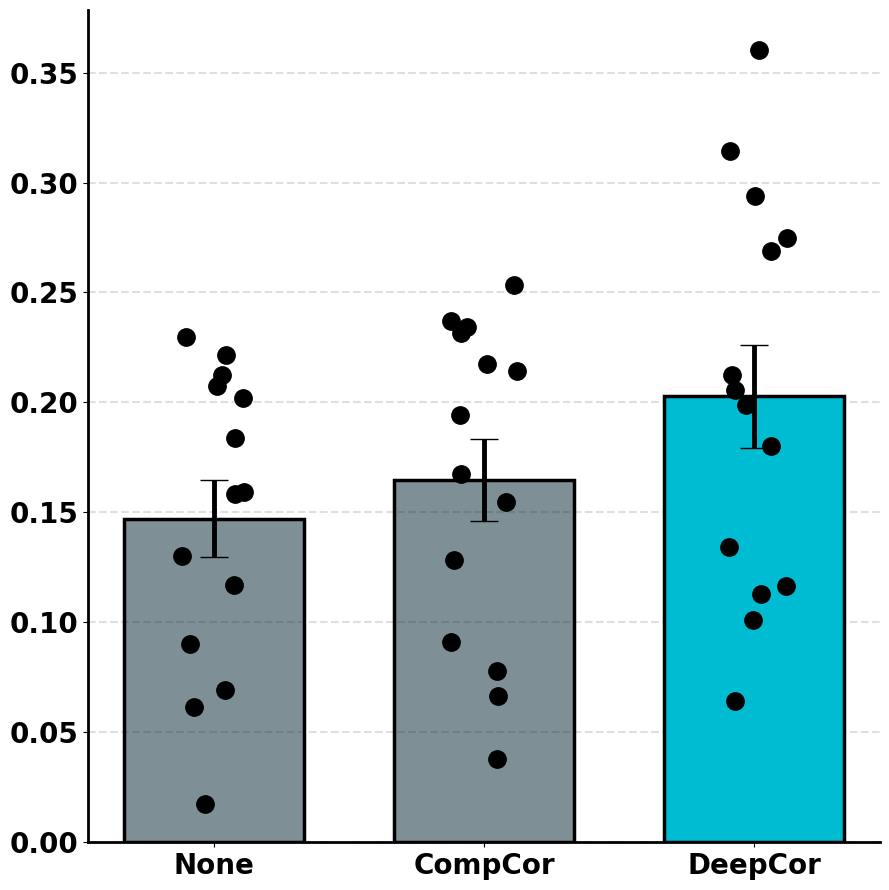

In [42]:
arrs = [vec_ffa,vec_compcor,vec_deepcor]

means = [arrs[0].mean(),arrs[1].mean(),arrs[2].mean()]
sems =[arrs[0].std(),arrs[1].std(),arrs[2].std()]
sems = np.array(sems) / np.sqrt(nsubs)

figsize = (9,9)
pretty_bar_plot2(means,sems,arrs,figsize)

In [19]:
arrs = [vec_ffa,vec_compcor,vec_deepcor]

In [20]:
subs = [f for f in os.listdir('../Data/StudyForrest/fmriprep/') if f.startswith('sub-')]
subs.sort()
len(subs)

14

In [21]:
colnames = ['NoDenoise','CompCor','DeepCor']
df = pd.DataFrame(np.array(arrs).transpose(),columns=colnames)
df['subject'] = subs
df.to_csv('../fig02-he-data.csv')